In [40]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

df.columns = [u'Week', u'Store', u'Canal_ID', u'Ruta_SAK', u'Cliente_ID',
       u'Product_ID', u'Sales_Units', u'Sales_Amount', u'Returned_Units',
       u'Returned_Amount', u'Adjusted_Demand_Units']
df['Recalculated_Demand'] = df['Sales_Units'] - df['Returned_Units']
df.head()

,Week,Store,Canal_ID,Ruta_SAK,Cliente_ID,Product_ID,Sales_Units,Sales_Amount,Returned_Units,Returned_Amount,Adjusted_Demand_Units,Recalculated_Demand
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3,3


In [58]:
from sklearn.cross_validation import train_test_split

pivot_df = df.pivot_table(index = ['Store', 'Product_ID'], columns ='Week', 
                         values = ['Sales_Units', 'Adjusted_Demand_Units'])
pivot_df = train_1.fillna(0)

train, test = train_test_split(pivot_df, train_size = 0.8)

pivot_df.head()


Sales_Units                                            \
Week                       3           4           5          6      7   
Store Product_ID                                                         
1110  73            9.000000   24.000000    6.500000   6.000000  18.00   
      100           0.000000    0.000000    0.000000   0.000000  25.00   
      108         109.333333  116.800000  110.400000  44.666667  72.00   
      145          18.866667   14.403846   23.978723  28.659574  18.86   
      163           1.500000    1.666667    2.000000   1.000000   0.00   

                                    Adjusted_Demand_Units              \
Week                   8          9                     3           4   
Store Product_ID                                                        
1110  73          18.000  18.000000              9.000000   24.000000   
      100          0.000  25.000000              0.000000    0.000000   
      108         93.125  98.285714            109.333333  116.800000   
      145         11.880  12.740741             18.866667   14.384615   
      163          2.000   3.000000              1.500000    1.666667   

                                                                   
Week                       5          6      7       8          9  
Store Product_ID                                                   
1110  73            6.000000   6.000000  18.00  18.000  18.000000  
      100           0.000000   0.000000   0.00   0.000   0.000000  
      108         110.400000  44.666667  72.00  93.125  98.285714  
      145          23.957447  28.659574  18.76  11.880  12.685185  
      163           2.000000   1.000000   0.00   2.000   3.000000

In [57]:
X_train = train['Sales_Units'][range(3,9)].values
y_train = train['Adjusted_Demand_Units'][9].values
X_train

array([[   0.        ,    0.        ,    0.        ,    0.        ,
           4.22580645,    4.41269841],
       [  96.25      ,  107.5       ,  105.25      ,  105.        ,
          95.5       ,   99.875     ],
       [  32.65      ,   30.24074074,   34.74074074,   31.97959184,
          34.64      ,   32.73076923],
       ..., 
       [   3.41216216,    3.61744966,    3.27439024,    3.57228916,
           3.51079137,    3.44859813],
       [  12.375     ,   10.14893617,    7.734375  ,    8.23529412,
           9.95      ,    8.4375    ],
       [  18.        ,    6.        ,    8.5       ,    6.        ,
           6.        ,    7.        ]])

In [34]:
from sklearn import linear_model
    
clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
clf.coef_


array([ 0.19646736,  0.04797149,  0.01037842,  0.15665713,  0.08176214,
        0.44542052])

In [35]:
X_test = test['Sales_Units'][range(3,9)].values
y_test = test['Adjusted_Demand_Units'][9].values

y_predict = clf.predict(X_test)


In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predict)

1969.6549779310149

(0, 200)

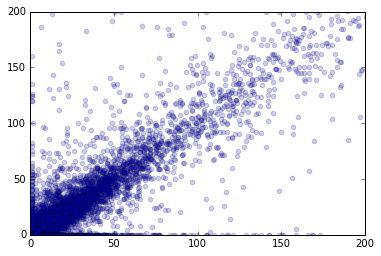

In [46]:
fig,ax = plt.subplots()
ax.scatter(y_predict, y_test, alpha = 0.2)
ax.set_ylim(0, 200)
ax.set_xlim(0, 200)


In [55]:
from sklearn.ensemble.forest import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)
mean_squared_error(y_test, y_predict)


1887.2067629995875

(0, 200)

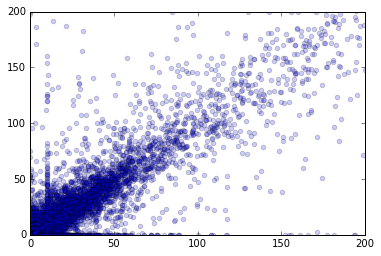

In [49]:
fig,ax = plt.subplots()
ax.scatter(y_predict, y_test, alpha = 0.2)
ax.set_ylim(0, 200)
ax.set_xlim(0, 200)